<a href="https://colab.research.google.com/github/riveramatthew/CIS-4170/blob/main/Olympics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import math

In [ ]:
%%bash
pip install openpyxl

In [ ]:
# import winter datasets
df_medal = pd.read_csv("beijing-2022-olympics/medals.csv")
df_total_medals = pd.read_csv("beijing-2022-olympics/medals_total.csv")
df_events = pd.read_csv("beijing-2022-olympics/events.csv")
df_athletes = pd.read_csv("beijing-2022-olympics/athletes.csv")

# import summer datasets
s_athletes = pd.read_excel("2021-olympics-in-tokyo/Athletes.xlsx")

In [ ]:
# Let's start with a data comparaison between 2022 Winter and 2021 Summer Olympic Games
d_start = pd.to_datetime(df_events["time"][0])
d_end = pd.to_datetime(df_events["time"][len(df_events)-1])
days = d_end - d_start

df_og = pd.DataFrame()
competition = ["Summer", "Winter"]
nb_discipline = []
#nb_event = []
nb_country = []
nb_athlete = []
#nb_day = []

nb_discipline.append(len(s_athletes["Discipline"].unique()))
nb_discipline.append(len(df_medal["discipline"].unique()))
#nb_event.append(len(df_medal["event"].unique()))
nb_country.append(len(s_athletes["NOC"].unique()))
nb_country.append(len(df_athletes["country"].unique()))
nb_athlete.append(len(s_athletes["Name"].unique()))
nb_athlete.append(len(df_athletes["name"].unique()))
#nb_day.append(days)


In [ ]:
#print("There is", nb_event, "events seperated in", nb_discipline, "different disciplines")

df_og["competition"] = competition
df_og["disciplines"] = nb_discipline
#df_og["events"] = nb_event
df_og["countries"] = nb_country
df_og["athletes"] = nb_athlete
#df_og["days"] = nb_day

df_og

df_og.style.set_caption('Summer vs Winter')

,competition,disciplines,countries,athletes
0,Summer,46,206,11062
1,Winter,15,91,2894


## 2. Medal table

In [ ]:
df_medal.head()

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,event,country,country_code,discipline,discipline_code
0,Gold,1,2022-02-05 00:00:00.0,ECKHOFF T,ECKHOFF Tiril,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),Norway,NOR,Biathlon,BTH
1,Gold,1,2022-02-05 00:00:00.0,ROEISELAND MO,ROEISELAND Marte Olsbu,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),Norway,NOR,Biathlon,BTH
2,Gold,1,2022-02-05 00:00:00.0,BOE T,BOE Tarjei,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),Norway,NOR,Biathlon,BTH
3,Gold,1,2022-02-05 00:00:00.0,BOE JT,BOE Johannes Thingnes,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),Norway,NOR,Biathlon,BTH
4,Silver,2,2022-02-05 00:00:00.0,CHEVALIER-BOUCHET,CHEVALIER-BOUCHET Anais,X,../../../en/results/biathlon/athlete-profile-n...,Mixed Relay 4x6km (W+M),France,FRA,Biathlon,BTH


In [ ]:
cols = ["medal_type", "event", "country", "discipline"]
df_medal = df_medal[cols]

# I add a column "Discipline" which represent the number of different discipline in which a country won medals
countries = df_total_medals["Country"]
nb_d = []
df_medal.drop_duplicates()

for country in countries:
    temp = df_medal.drop_duplicates()[df_medal.drop_duplicates()["country"] == country]
    temp_2 = temp["discipline"]
    temp_2 = temp_2.drop_duplicates()
    #print(country, "obtain medals in", len(temp_2), "different discipline")
    nb_d.append(len(temp_2))
    
df_total_medals["Discipline"] = nb_d

In [ ]:
columns = ["Order", "Country", "Bronze", "Silver", "Gold", "Total", "Order by Total", "Country Code","Discipline"]
df_total_medals = df_total_medals.reindex(columns=columns)

In [ ]:
# a little manipulation to add ranking on the medals table
for i in range(len(df_total_medals)):
    df_total_medals["Country"][i] = "#" + str(df_total_medals["Order"][i]) + " " + df_total_medals["Country"][i]

<ipython-input-44-78d4e7d12fc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_medals["Country"][i] = "#" + str(df_total_medals["Order"][i]) + " " + df_total_medals["Country"][i]


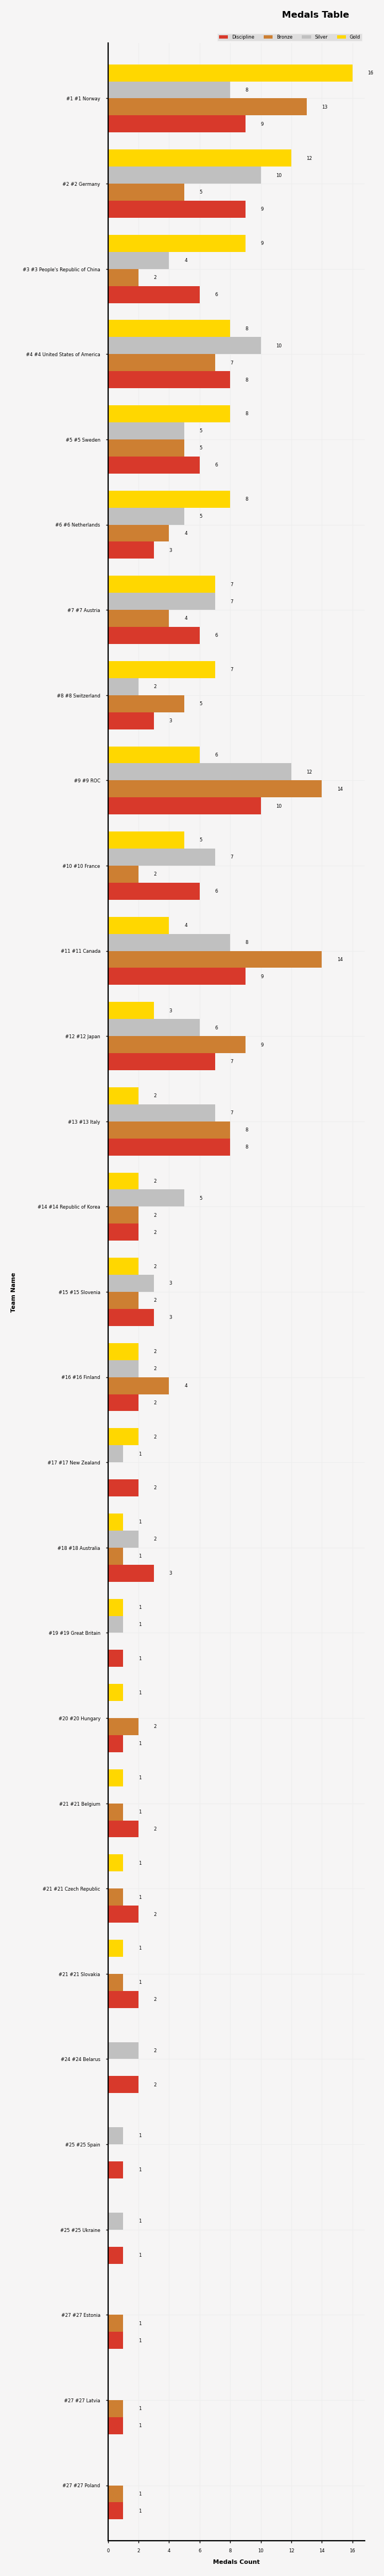

In [ ]:
# Medals barplot
df_total_medals = df_total_medals.sort_index(ascending=False)

# figure prep
plt.rcParams['figure.dpi'] = 200 # figure dots per inch
fig = plt.figure(figsize=(3,30), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#D8392B','#CD7F32','#C0C0C0','#FFD700'])
ax0 = fig.add_subplot(gs[0, 0])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)

#things to plot on the figure
ax0_sns = df_total_medals.plot(x='Country',y=['Discipline','Bronze','Silver','Gold'],kind='barh',ax=ax0,zorder=2,width=0.8)
ax0_sns.set_xlabel('Medals Count',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Team Name',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)
ax0_sns.legend(['Discipline','Bronze', 'Silver','Gold'], ncol=4, facecolor='#D8D8D8'\
               ,edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.005), loc='upper right')

for p in ax0_sns.patches:
        value = f'{p.get_width():.0f}' 
        if value == '0':
            pass
        else:
            x = p.get_x() + p.get_width() + 1
            y = p.get_y() + p.get_height() / 2
            ax0.text(x, y, value, ha='left', va='center', fontsize=3)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xend-1, Yend+0.3, f'Medals Table', fontsize=6, weight='bold',ha='right')

plt.show()

## 3. EDA on gender

In [ ]:
athletes = pd.read_csv("beijing-2022-olympics/athletes.csv")
athletes = athletes.rename(columns={"discipline": "Discipline", "country": "Country"})

cols = ["gender", "Discipline"]
gender = athletes[cols]
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gender      2897 non-null   object
 1   Discipline  2885 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [ ]:
gender["Discipline"].value_counts()

Ice Hockey                   546
Alpine Skiing                310
Cross-Country Skiing         297
Freestyle Skiing             267
Snowboard                    233
Biathlon                     208
Bobsleigh                    165
Speed Skating                163
Figure Skating               145
Curling                      114
Short Track Speed Skating    112
Ski Jumping                  110
Luge                         106
Nordic Combined               59
Skeleton                      50
Name: Discipline, dtype: int64

In [ ]:
gender["M"] = 0
gender["F"] = 0

i=0
while i < len(gender["gender"]):
    if gender['gender'][i] == 'Male':
        gender['M'][i] = 1
    else:
        gender['F'][i] = 1
    i+=1
    
gender['Male'] = gender.groupby('Discipline')['M'].transform('sum')
gender['Female'] = gender.groupby('Discipline')['F'].transform('sum')

del gender['gender']
del gender['M']
del gender['F']

gender = gender.drop_duplicates()
gender = gender.iloc[:-1 , :]

gender["Total"] = gender["Male"] + gender["Female"]

total_male = int(gender['Male'].sum())
total_female = int(gender['Female'].sum())

<ipython-input-49-b36dd0b490de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender["M"] = 0
<ipython-input-49-b36dd0b490de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender["F"] = 0
<ipython-input-49-b36dd0b490de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender['M'][i] = 1
/Users/matthewrivera/anaconda3/

In [ ]:
print("There is a total of", total_male, "male and", total_female, "female for the Beijing 2022 Olympic Games")

There is a total of 1595 male and 1290 female for the Beijing 2022 Olympic Games


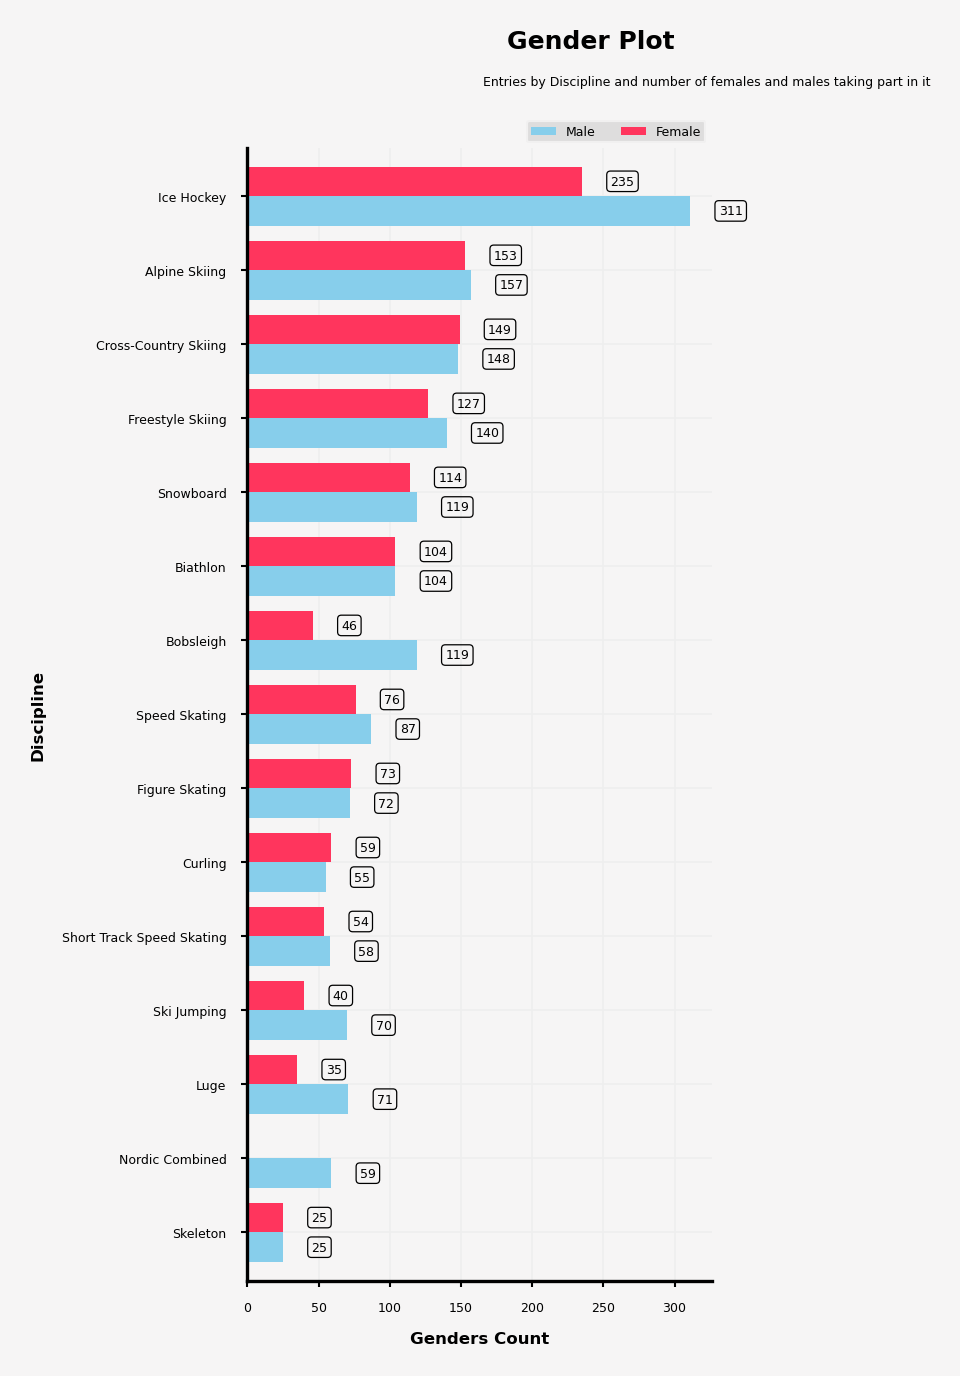

In [ ]:
gender.sort_values(by='Total',inplace=True)

# Gender barplot
plt.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(2,5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#87ceeb','#ff355d'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = gender.plot(x='Discipline',y=['Male','Female'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plotttt of bars
ax0_sns.set_xlabel('Genders Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5) # w and l of petit trait de mesure de l'axe x et y

ax0_sns.legend(['Male', 'Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.03), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 20
                y = p.get_y() + p.get_height() / 2 
                ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


ax0_sns.text(300,16, f'Gender Plot', fontsize=6, weight='bold',ha='right')
ax0.text(480, 15.5,f'Entries by Discipline and number of females and males taking part in it',fontsize=3,ha='right')

plt.show()

## 4. EDA on Athletes

In [ ]:
athletes.head()

,name,short_name,gender,birth_date,birth_place,birth_country,Country,country_code,Discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AAGAARD Mikkel,AAGAARD M,Male,1995-10-18,FREDERIKSHAVN,Denmark,Denmark,DEN,Ice Hockey,IHO,ORNSKOLDSVIK,Sweden,1.84/6'0'',../../../en/results/ice-hockey/athlete-profile...
1,AALTO Antti,AALTO A,Male,1995-04-02,KITEE,Finland,Finland,FIN,Ski Jumping,SJP,KUOPIO,Finland,NaN,../../../en/results/ski-jumping/athlete-profil...
2,AALTONEN Miro,AALTONEN M,Male,1993-06-07,JOENSUU,Finland,Finland,FIN,Ice Hockey,IHO,PODOLSK,Russian Federation,1.80/5'10'',../../../en/results/ice-hockey/athlete-profile...
3,ABDELKADER Justin,ABDELKADER J,Male,1987-02-25,"MUSKEGON, MI",United States of America,United States of America,USA,Ice Hockey,IHO,"GRAND RAPIDS, MI",United States of America,1.87/6'1'',../../../en/results/ice-hockey/athlete-profile...
4,ABDI Fayik,ABDI F,Male,1997-10-07,"SAN DIEGO, CA",United States of America,Saudi Arabia,KSA,Alpine Skiing,ALP,DHAHRAN,Saudi Arabia,NaN,../../../en/results/alpine-skiing/athlete-prof...


In [ ]:
cols = ["Country", "Discipline"]
athletes = athletes[cols]

athletes.head()

,Country,Discipline
0,Denmark,Ice Hockey
1,Finland,Ski Jumping
2,Finland,Ice Hockey
3,United States of America,Ice Hockey
4,Saudi Arabia,Alpine Skiing


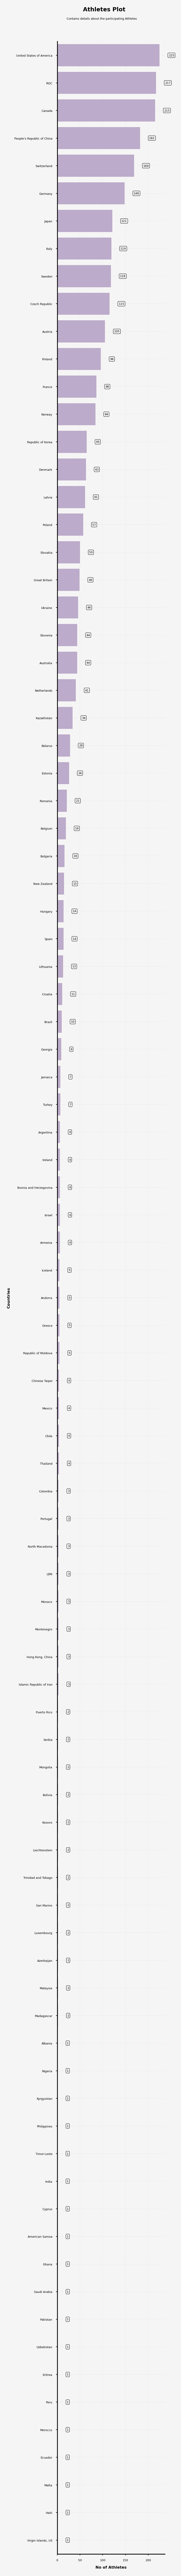

In [ ]:
y = athletes.Country.value_counts().index
x = athletes.Country.value_counts().values

# Athletes barplot with Discipline
plt.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(2,48), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#bca6cf']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=athletes,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Athletes',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Countries',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

# ax0_sns.legend(ncol=4, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.022, 1.005), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 20
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# plt.title(f'Athletes Plot',fontdict=dict(fontsize=6,weight='bold',horizontalalignment= 'right'),loc='right')





ax0_sns.text(150,-1.6, f'Athletes Plot', fontsize=6, weight='bold',ha='right')
ax0.text(175,-1.3,f'Contains details about the participating Athletes',fontsize=3,ha='right')
#ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

## 5. EDA on number of teams per discipline

In [ ]:
cols = ["Country", "Discipline"]
sports = athletes[cols]
sports.sort_values(by='Discipline',inplace=True)
sports = sports.drop_duplicates()
sports = sports["Discipline"].value_counts()

In [ ]:
df_sport = pd.DataFrame()

df_sport["Discipline"] = sports.index
df_sport["teams"] = sports.values

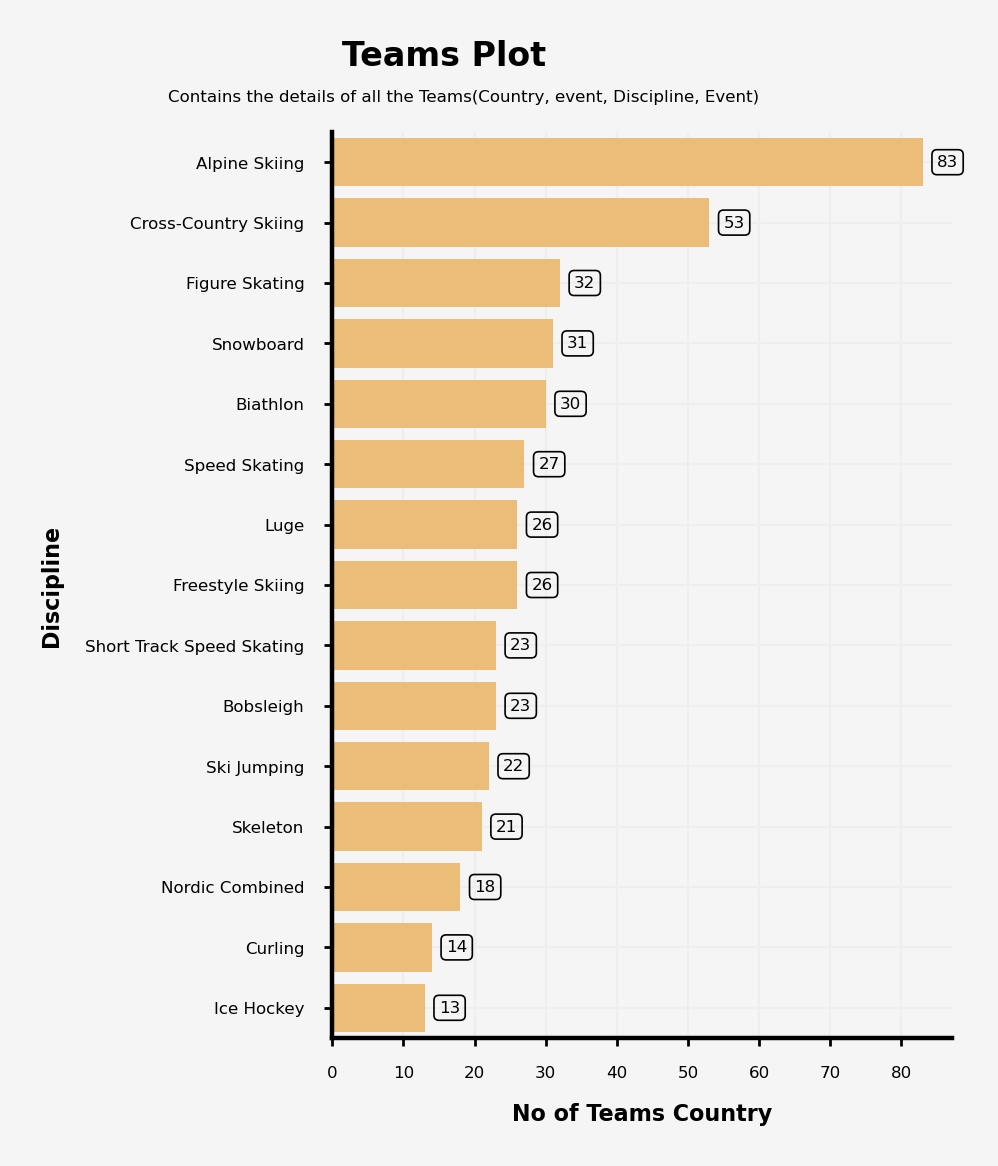

In [ ]:
x = df_sport["teams"]
y = df_sport["Discipline"]

# Teams barplot
plt.rcParams['figure.dpi'] = 400

fig = plt.figure(figsize=(2,3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ffc166']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)

ax0_sns = sns.barplot(data=df_sport,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Teams Country',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 2
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(30,-1.6, f'Teams Plot', fontsize=6, weight='bold',ha='right')
ax0.text(60,-1,f'Contains the details of all the Teams(Country, event, Discipline, Event)',fontsize=3,ha='right')

plt.show()

## 6. What was the impact for China to host the Olympic games in terms of medals ?

In [ ]:
df = pd.read_csv("120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
df.sort_values(by='Year',inplace=True)

df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
214333,107607,Fritz Richard Gustav Schuft,M,19.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
244717,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver
244716,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN
23912,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN
23913,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142355,71419,Luis Fernando Lpez Erazo,M,37.0,166.0,60.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
47729,24610,Enrico D'Aniello,M,20.0,152.0,53.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,NaN
47728,24609,Sabrina D'Angelo,F,23.0,173.0,71.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze
47746,24621,Andrea Mitchell D'Arrigo,M,21.0,194.0,85.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Freestyle,NaN


In [ ]:
df_winter_china = df[(df["NOC"] == "CHN") & (df["Season"] == "Winter")]
df_winter_china.dropna(subset = ["Medal"], inplace=True)

cols = ["Year", "Medal", "Event"]
df_winter_china = df_winter_china[cols]
df_winter_china = df_winter_china.drop_duplicates()
del df_winter_china["Event"]

df_winter_china = pd.get_dummies(df_winter_china)

df_winter_china['Bronze'] = df_winter_china.groupby('Year')['Medal_Bronze'].transform('sum')
df_winter_china['Silver'] = df_winter_china.groupby('Year')['Medal_Silver'].transform('sum')
df_winter_china['Gold'] = df_winter_china.groupby('Year')['Medal_Gold'].transform('sum')

del df_winter_china['Medal_Bronze']
del df_winter_china['Medal_Silver']
del df_winter_china['Medal_Gold']

df_winter_china = df_winter_china.drop_duplicates()
df_winter_china['Total Medals'] = df_winter_china['Bronze'] + df_winter_china['Silver'] + df_winter_china['Gold']

# let's add the missing years
china_1980 = {'Year': 1980, 'Bronze': 0, 'Silver': 0, 'Gold': 0, 'Total Medals': 0}
china_1984 = {'Year': 1984, 'Bronze': 0, 'Silver': 0, 'Gold': 0, 'Total Medals': 0}
china_1988 = {'Year': 1988, 'Bronze': 0, 'Silver': 0, 'Gold': 0, 'Total Medals': 0}
china_2018 = {'Year': 2018, 'Bronze': 2, 'Silver': 6, 'Gold': 1, 'Total Medals': 9}
china_2022 = {'Year': 2022, 'Bronze': 2, 'Silver': 4, 'Gold': 9, 'Total Medals': 15}

df_winter_china = df_winter_china.append(china_1980, ignore_index = True)
df_winter_china = df_winter_china.append(china_1984, ignore_index = True)
df_winter_china = df_winter_china.append(china_1988, ignore_index = True)
df_winter_china = df_winter_china.append(china_2018, ignore_index = True)
df_winter_china = df_winter_china.append(china_2022, ignore_index = True)

df_winter_china.sort_values(by='Year',inplace=True)

<ipython-input-62-36f50537b93b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter_china.dropna(subset = ["Medal"], inplace=True)


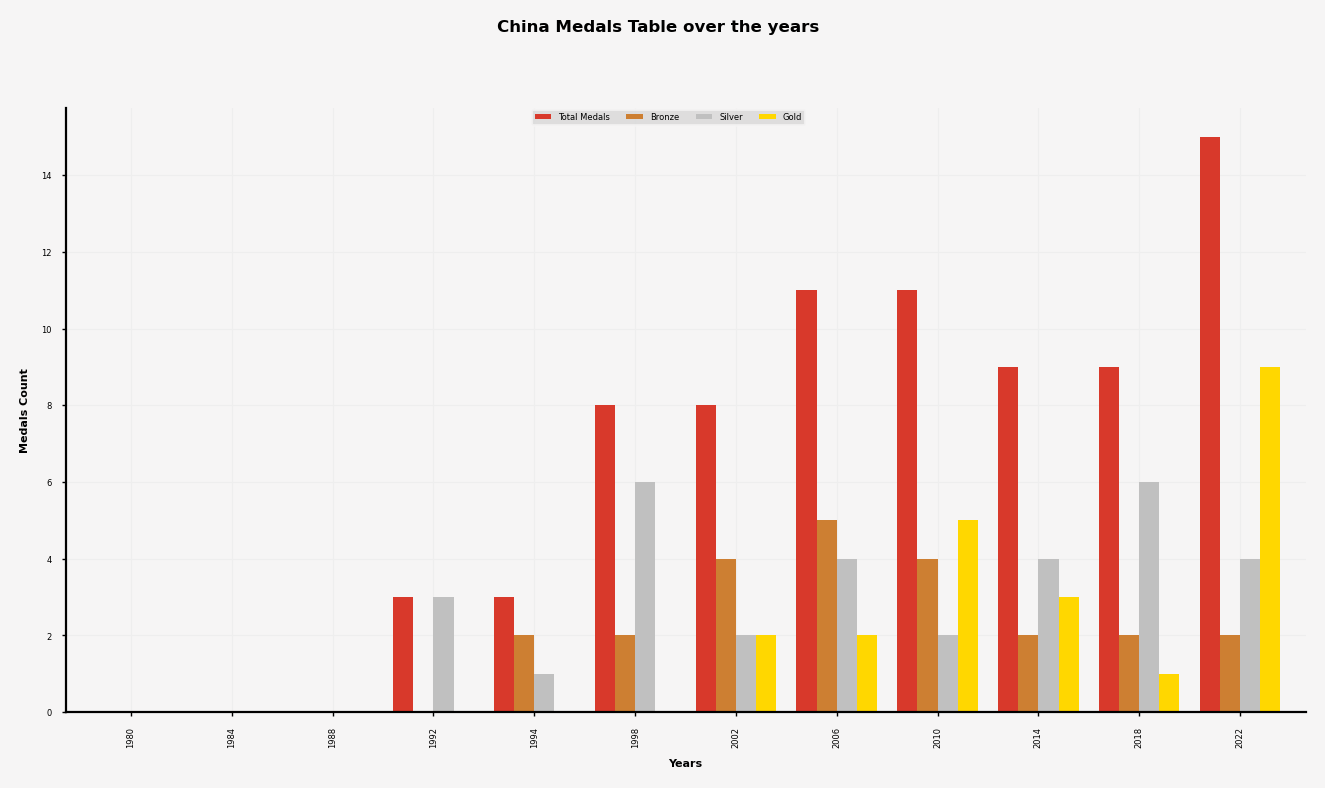

In [ ]:
plt.rcParams['figure.dpi'] = 200
fig = plt.figure(figsize=(8,4), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#D8392B','#CD7F32','#C0C0C0','#FFD700'])
ax0 = fig.add_subplot(gs[0, 0])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)

#things to plot on the figure
ax0_sns = df_winter_china.plot(x='Year',y=['Total Medals','Bronze','Silver','Gold'],kind='bar',ax=ax0,zorder=2,width=0.8)
ax0_sns.set_xlabel('Years',fontsize=4, weight='bold',) # taille label x
ax0_sns.set_ylabel('Medals Count',fontsize=4, weight='bold') # taille label y

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4) # epaisseur des traites de grillages gris
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)
ax0_sns.legend(['Total Medals','Bronze', 'Silver','Gold'], ncol=4, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3\
               ,bbox_to_anchor=(0.6, 1.005), loc='upper right')

for p in ax0_sns.patches: # les petits nombres a c$oté des bars
        value = f'{p.get_width():.0f}' 
        if value == '0':
            pass
        else:
            x = p.get_x() + p.get_width() + 1
            y = p.get_y() + p.get_height() / 2
            ax0.text(x, y, value, ha='left', va='center', fontsize=3)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text((Xend/2)+1, Yend+2, f'China Medals Table over the years', fontsize=6, weight='bold',ha='right')

plt.show()